<a href="https://colab.research.google.com/github/NGUYEN-VAN-HCMUT/DL2021/blob/main/3_0_gaussian_mixture_models_gmms_with_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


3. Gaussian Mixture Models (GMMs)

  3.1   The Three Archers - Not So 'normal' Data

In an archery training session, three archers are told to shoot at the target. Assume that the archers are shooting the same arrows and later at the end of the competition they need to count their scores. What would be the best estimate of their scores? Assume that inner yellow has the highest score and the score lowers as the circle your arrow lands in moves away from the center.

The arrows data would look like this, if we remove the target and the arrows:

**Exercise:**
The code below generates the dataset about which we shall study later. For now,

*   Cluster this dataset using k-means and assign the cluster labels to a column 'k_means_labels'
*   Visualize the graph by assigning it to g.

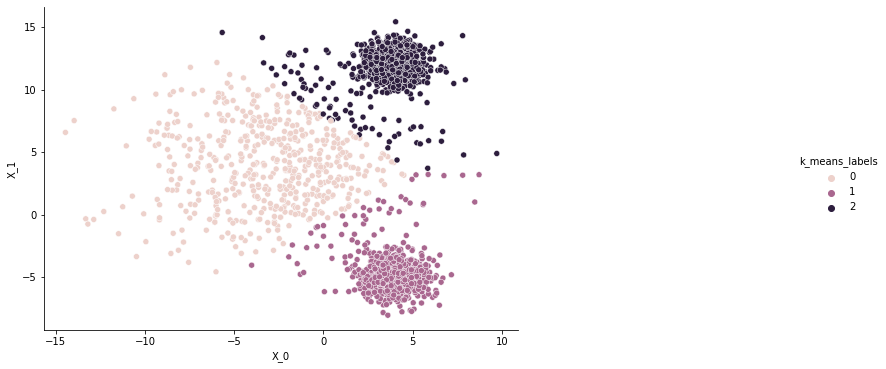

In [11]:
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

import numpy as np
import seaborn as sns
import pandas as pd

centers = [[4, -5], [-2, 4], [4, 12]]
X, y = datasets.make_blobs(n_samples=2000, centers=centers, cluster_std=[1.0, 4.0, 1.0], random_state=0)

blob_df = pd.DataFrame({'X_0':X[:,0] ,'X_1':X[:,1], 'y':y})

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
blob_df['k_means_labels'] = kmeans.labels_
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="k_means_labels", data = blob_df)
g.fig.set_size_inches(14, 6)
sns.despine()
#sns.plt.show()

**3.2: GMM to the rescue**

Gaussian Mixture Models

Gaussian Mixture Models is a probabilistic model for representing data that conform to a finite set of latent gaussian distributions. The GMMs are used for clustering and for classification if the latter target values are known apriori. GMM clustering algorithm involves estimating the parameters of the mixtures by the EM (Expectation Maximization) Algorithm. Once these parameters are estimated, then the algorithm can be used as a classifier to predict test dataset.

Import the GaussianMixture from sklearn.mixture:



In [13]:

from sklearn.mixture import GaussianMixture

**Generate the dataset:**

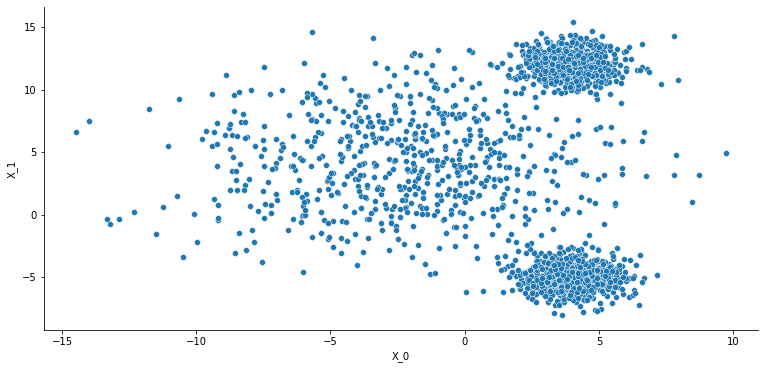

In [14]:
##### Create clusters using make_blob feature
centers = [[4, -5], [-2, 4], [4, 12]]
X,y = datasets.make_blobs(n_samples=2000, centers=centers, cluster_std=[1.0, 4.0, 1.0], random_state=0)
#Visulaizing the blobs created in a joint plot
blob_df = pd.DataFrame({'X_0':X[:,0],'X_1':X[:,1], 'y':y})
g = sns.pairplot(x_vars="X_0", y_vars="X_1", data = blob_df)
g.fig.set_size_inches(14, 6)
sns.despine()
#sns.plt.show()

**Exercise:**
Let us determine the number of clusters that the GMM can find by plotting the AIC vs BIC plot.

Assign the AICs and BICs to the variable aics and bics

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


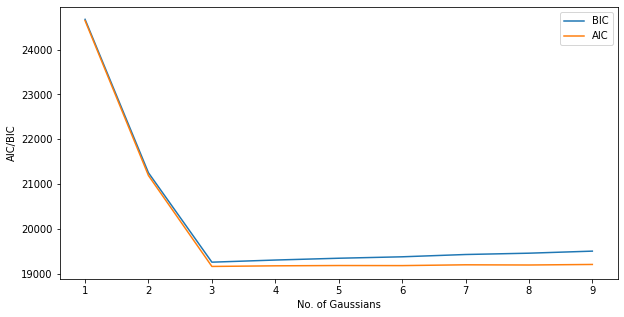

In [5]:
from matplotlib import pyplot as plt
from sklearn import datasets, mixture
from sklearn.mixture import GaussianMixture
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

import numpy as np
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

blob_x = blob_df[['X_0', 'X_1']]
n_clusters = np.arange(1, 10)
clusters = [GaussianMixture(n).fit(blob_x) for n in n_clusters]

bics = [cluster.bic(blob_x) for cluster in clusters]
aics = [cluster.aic(blob_x) for cluster in clusters]

plt.figure(figsize=(10,5))
plt.plot(n_clusters, bics, label='BIC')
plt.plot(n_clusters, aics, label='AIC')
plt.ylabel('AIC/BIC'),  plt.xlabel('No. of Gaussians')
plt.legend()
plt.show()

**3.3: Clustering with GMMs**

To cluster the GMMs we shall use the GaussianMixture with 3 clusters that we identified in the AIC vs BIC curve. We first fit the GaussianMixture and then predict the cluster associations for each point.

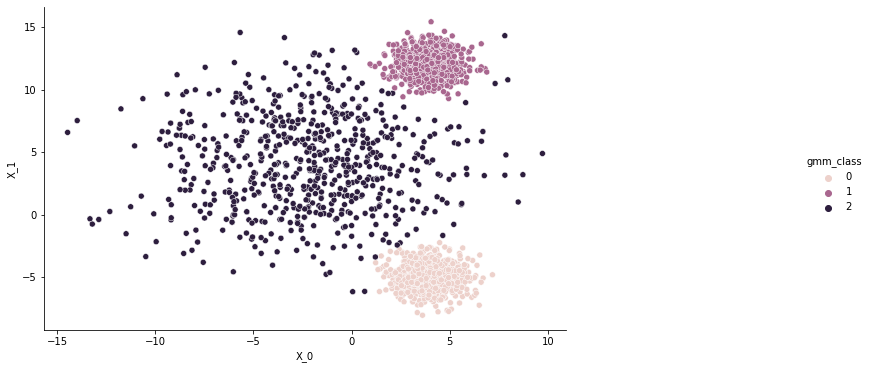

In [8]:
mixture_model = mixture.GaussianMixture(n_components=3, covariance_type='spherical').fit(blob_df.values )
#Cluster data using the classifer and visulaize the results
y_hat = mixture_model.predict(blob_df.values)
blob_df['gmm_class'] = y_hat
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="gmm_class", data = blob_df)
g.fig.set_size_inches(14, 6)
sns.despine()


**Exercise:**
A mixture model is instantiated with 3 clusters with covariance type 'spherical' and fit to the blob_df.

Assign the cluster labels to a column gmm_cluster in the blob_df and generate a pairplot

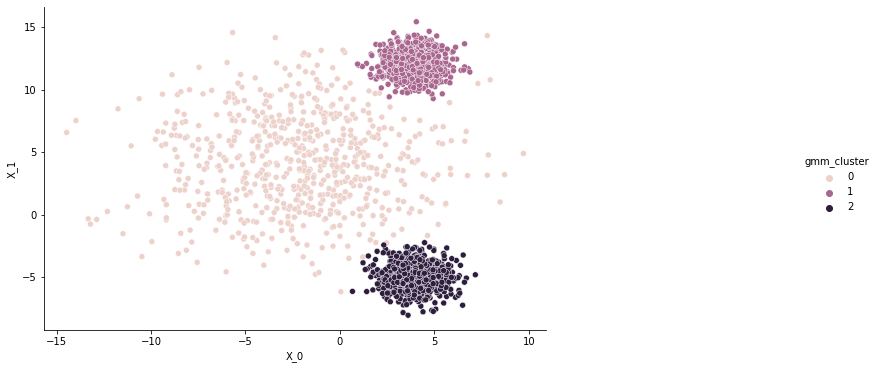

In [10]:
# Fit a GMM to the blobs
mixture_model = mixture.GaussianMixture(n_components=3, covariance_type='spherical').fit(X)

# Run a prediction and off the fit GMM and create a new column gmm_cluster

y_hat = mixture_model.predict(X)
blob_df['gmm_cluster'] = y_hat
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="gmm_cluster", data = blob_df)
g.fig.set_size_inches(14, 6)
sns.despine()
#sns.plt.show()

**GMMs**


*   Gaussian Mixture Models assume that the datasets adhere to a finite set of normal distributions.
*   Since, these distributions are unknown apriori, this is treated as an unsupervised problem.
*   Once these cluster associations are estimated, the test data can be associated keeping these estimated parameters.
*   EM Algorithm is used to estimate the means and variances.